#### This is the notebook I used for prototyping and testing the different plots.

In [ ]:
import pandas as pd
import numpy as np
#import hvplot.pandas
import holoviews as hv
import panel as pn
import panel.widgets as pnw
from PIL import Image
pn.extension()

%matplotlib inline

In [2]:
wine = pd.read_csv('clean_wine.csv')


In [3]:
# Adding style for the Panels
css = '''
.panel-widget-box {
  background: #fdfdfd;
  border-radius: 5px;
  border: 1px black solid;
}
'''
pn.extension(raw_css=[css])

In [5]:
import hvplot.pandas

In [6]:
wine.head()

title   country  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     Italy   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portugal   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)        US   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        US   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...        US   

                                         description  desc_length  rating  \
0  Aromas include tropical fruit, broom, brimston...          172      87   
1  This is ripe and fruity, a wine that is smooth...          227      87   
2  Tart and snappy, the flavors of lime flesh and...          186      87   
3  Pineapple rind, lemon pith and orange blossom ...          199      87   
4  Much like the regular bottling from 2012, this...          249      87   

   price         taster_name grape_variety  vintage  
0   17.0       Kerin O’Keefe         white     2013  
1   15.0          Roger Voss           red     2011  
2   14.0        Paul Gregutt           red     2013  
3   13.0  Alexander Peartree         white     2013  
4   65.0        Paul Gregutt           red     2012

In [7]:
def set_toolbar_options(plot, element):
    bokeh_plot = plot.state
    bokeh_plot.toolbar.autohide = True
    bokeh_plot.toolbar_location="above"
    bokeh_plot.toolbar.logo = None
    #bokeh_plot.toolbar_location = None
vgr = pd.DataFrame(wine.groupby(['vintage','grape_variety'])['rating'].mean().reset_index())

year = pnw.RangeSlider(name='yearRange', start=1900, end=2020, value=(1900, 2020), step=10, width=1200)

@pn.depends(year)
def lp(year):
    l = vgr.loc[(vgr['vintage']>=year[0]) & (vgr['vintage'] <= year[1])].hvplot.line(x='vintage',
                                                                                     y='rating', 
                                                                                     by='grape_variety', 
                                                                                     color=['red','gray','plum'], 
                                                                                     title='Average Ratings by Vintage Year', 
                                                                                     width=1200, height=400) 
    s = vgr.loc[(vgr['vintage']>=year[0]) & (vgr['vintage'] <= year[1])].hvplot.scatter(x='vintage',
                                                                                        y='rating', 
                                                                                        by='grape_variety', 
                                                                                        color=['red','gray','plum'], 
                                                                                        title='Average Ratings by Vintage Year',
                                                                                        width=1200, height=400)
    
    p = l * s
    p.opts(hooks=[set_toolbar_options], backend='bokeh')
    
    return p

text = '''
        <br><br> Judging by the line graph, it seems that the ratings peak for both types of wines from the 1970 and then goes down after that period. It is possible to check different periods using the slider
        but it seems that white wines rate better overall.
        '''

text = 'This is a text string'
vp = pn.Column(year,lp, css_classes=['panel-widget-box'], width=1440)

In [8]:
#wine.hvplot.hist(y='rating', hover_alpha=0.6)

In [9]:
#wine.hvplot.box(y='rating', by='taster_name', width=1000, height=500).opts(xrotation=90)

In [10]:
#pd.DataFrame(np.round(df['rating'].describe(),2)).reset_index().rename({'index':'Stats'}, axis=1).hvplot.table(width=150)

In [11]:
def set_toolbar_options(plot, element):
    bokeh_plot = plot.state
    bokeh_plot.toolbar.autohide = True
    bokeh_plot.toolbar_location="above"
    bokeh_plot.toolbar.logo = None
    #bokeh_plot.toolbar_location = None

In [12]:
p = Image.open('glasses-306346_1280.png')
logo  = pn.pane.PNG(p,width=150, height=127)
title = pn.pane.HTML("<b>Wines Reviews Analysis</b> by Juan Marte" )
desc = pn.pane.HTML("""
   <p><b>Overview: </b>
   The goal of this analysis is to understand in a visual context the trends and patterns found in the wine reviews dataset. T
   his dataset contains 130,000 reviews of different type of wines, published by the <a href="https://www.winemag.com/">Wine Enthusiast Magazine</a>. 
   It includes the wine name,  country, variety, price, amongst others descriptors for each reviewed wine.</p>
   
   <br><p>The original data was transformed to simplify the analysis: to avoid confusion points was renamed rating, added new columns for vintage, price range, rating range,grape variety
   and description lengh other than those they only columns left are country, description, rating(points), price, and taster_name. </p>                                                                                                           
                                                                                                           """, width=1200)

top = pn.Row(logo, pn.Column(title, desc), css_classes=['panel-widget-box'], width=1440, margin=(20,0,0,0))

In [13]:
rb = pnw.Button(name='Click For Random Sample', button_type='primary', css_classes=['panel_button'])

def rand_df():
    df = wine.sample(10).hvplot.table(width=500, height = 100)
    return df

ppp = pn.pane.HoloViews()

def b(event):

    ppp.object = rand_df()       


rb.on_click(b)

w_tab = pn.Column(rb, ppp, css_classes=['panel-widget-box'])

In [14]:
#Histogram and descriptive statistics


variable = pnw.Select(name='Select', options=['rating', 'desc_length', 'price', 'vintage'], width=75)
limits = pnw.RangeSlider(name='Limits', start=80, end=100, value=(80, 100), step=1, orientation='horizontal')
bins = pnw.IntSlider(name='bins', value=20, start=10, end=100, orientation='vertical', width=50)

def cb(event):    
    if event.new == 'price':        
        limits.value = (int(wine['price'].min()),int(wine['price'].max()))
        limits.start = int(wine['price'].min())
        limits.end = int(wine['price'].max())
        limits.step = 50

    elif event.new == 'rating':
        limits.value = (int(wine['rating'].min()),int(wine['rating'].max()))
        limits.start = int(wine['rating'].min())
        limits.end = int(wine['rating'].max())
        limits.step = 1
        
        
    elif event.new == 'desc_length':
        limits.value = (int(wine['desc_length'].min()),int(wine['desc_length'].max()))
        limits.start = int(wine['desc_length'].min())
        limits.end = int(wine['desc_length'].max())
        limits.step = 10
        
        
    elif event.new == 'vintage':
        limits.value = (1900,int(wine['vintage'].max()))
        limits.start = int(wine['vintage'].min())
        limits.end = int(wine['vintage'].max())
        limits.step = 10
    else:
        pass
    
variable.param.watch(cb,'value')

@pn.depends(variable, limits, bins)
def w_hist(variable, limits, bins):
    
    h_dat =  wine.loc[(wine[variable]>=limits[0]) & (wine[variable]<=limits[1])]
    h = h_dat.hvplot.hist(y=variable, bins=bins, height=450, color='violet', hover_alpha=0.5, width=600, title='Histogram of '+variable)
    h.opts(hooks=[set_toolbar_options], backend='bokeh')
    return h


@pn.depends(variable)
def get_stats(variable='rating'):   
    df =  np.round(wine[variable].describe(),2).reset_index().rename({'index':'Stats'}, axis=1).T.hvplot.table(width=400, title='Descriptive Statistics')
    return df
insight_h = pn.pane.Markdown('''The distribution of wines prices on the data is extremely skewed to the right that's because the prices range from $4 up to $3300. 
                Also notice that 75% of all the wines reviewed cost less than 43 dollars. the distributions for rating and reviwed lengths seem normal.''', width=200, )

hg = pn.Column(pn.Row(pn.Column(variable,pn.Row(bins)),w_hist),limits,pn.Row(get_stats,insight_h), css_classes=['panel-widget-box'], width=700, height=700)

In [34]:
x = pnw.Select(name='Select X axis', options=['rating', 'desc_length', 'price', 'vintage'], sizing_mode="stretch_width" , max_width=100)
y = pnw.Select(name='Select Y axis', options=['rating', 'desc_length', 'price', 'vintage'], sizing_mode="stretch_width", max_width=100 )

@pn.depends(x,y)
def w_scatter(x='price',y='rating'):
    sp = wine.hvplot.scatter(x=x, y=y, width=500, height=400, hover=False, color='purple',title=x + ' vs ' + y + ' scatter plot')
    sp.opts(hooks=[set_toolbar_options], backend='bokeh')
    return sp

@pn.depends(x,y)
def get_corr(x,y):
    return 'Correlation Coefficient: ' + str(np.round(np.corrcoef(x=wine[x],y=wine[y])[1][0],2))

sp_insight = ''' 
                The doesn't seem to be a high correlation between the numerical variables as shown in the correlation matrix. The only slighlty correlated is description length with rating,
                which seems to imply that longer the review gets that higher the rating for the specific wine.
            '''

sp = pn.Column(pn.Row(x,y, get_corr),w_scatter,sp_insight, css_classes=['panel-widget-box'], width=500, height=550)
sp

Column(css_classes=['panel-widget-box'], height=550, sizing_mode='fixed', width=500)
    [0] Row
        [0] Select(max_width=100, options=['rating', 'desc_length', ...], sizing_mode='stretch_width', value='rating')
        [1] Select(max_width=100, options=['rating', 'desc_length', ...], sizing_mode='stretch_width', value='rating')
        [2] ParamFunction(function)
    [1] ParamFunction(function)
    [2] Markdown(str)

In [16]:
taster = pn.widgets.MultiChoice(name='Tasters Names', value=list(wine['taster_name'].value_counts().index),options=list(wine['taster_name'].value_counts().index))

@pn.depends(taster)
def taster_box(taster=list(wine['taster_name'].value_counts().index)):
    taste = wine.loc[wine['taster_name'].isin(taster)]
    orde = taste.groupby('taster_name')['rating'].median().sort_values(ascending=False).index
    bp = taste.hvplot.box(by='taster_name', y = 'rating', rot=45, width=1000, height=450, hover_cols=['taster_name'], color='#ac39ac')
    bp.opts(hooks=[set_toolbar_options], backend='bokeh')
    return bp
b_insight = '''
                The boxplot shows a comparison on the distribution of ratings for each taster. 


            '''
boxen = pn.Row(taster_box, taster, width=1440, height=500, margin=(10,0,0,0), css_classes=['panel-widget-box'])
boxen

Row(css_classes=['panel-widget-box'], height=500, margin=(10, 0, 0, 0), sizing_mode='fixed', width=1440)
    [0] ParamFunction(function)
    [1] MultiChoice(name='Tasters Names', options=['Roger Voss', ...], value=['Roger Voss', ...])

In [17]:
glass = Image.open('glass_of_words.PNG')
glass = pn.pane.PNG(glass, width = 200, height = 500)

text = '''The glass has the most common words and phrases found on all the descriptions from the wine reviews, the size of the word represent 
            the frequency of each term. It looks like tasters like to use; full bodied, black cherry and black fruit very often to describe the wine flavor, amonght other words.'''

glass =  pn.Column(glass, text, width = 240, height = 700, css_classes=['panel-widget-box'])

In [18]:
p = Image.open('grapes-34298_640.png')
logo  = pn.pane.PNG(p,width=150, height=127)
desc = pn.pane.HTML("""
  <b>Credits and Resources: </b><br>
   This analysis and the current dashboard were made with Python 3.8, used libraries: numpy, pandas, matplotlib, seaborn, nltk, PIL,WordCloud and panel.<br>   
   The pictures used as logos were taken from <a href=https://pixabay.com/vectors/search/wine/>pixalbay.com</a><br>
   The data for the grapes variety was obtained from <a href=https://en.wikipedia.org/wiki/List_of_grape_varieties>https://en.wikipedia.org/wiki/List_of_grape_varieties.</a>                                                                                                           
                                                                                                           """, width=1200)

bottom = pn.Row(desc, logo, css_classes=['panel-widget-box'], width=1440, margin=(20,0,0,0))

Column
    [0] Row(css_classes=['panel-widget-box'], margin=(20, 0, 0, 0), width=1440)
        [0] PNG(PngImageFile, height=127, sizing_mode='fixed', width=150)
        [1] Column
            [0] HTML(str)
            [1] HTML(str, width=1200)
    [1] Row
        [0] Column(css_classes=['panel-widget-box'], height=700, sizing_mode='fixed', width=700)
            [0] Row
                [0] Column
                    [0] Select(options=['rating', 'desc_length', ...], value='rating', width=75)
                    [1] Row
                        [0] IntSlider(end=100, name='bins', orientation='vertical', start=10, value=20, width=50)
                [1] ParamFunction(function)
            [1] RangeSlider(end=100, name='Limits', start=80, step=1, value=(80, 100))
            [2] Row
                [0] ParamFunction(function)
                [1] Markdown(str, width=200)
        [1] Column
            [0] Column(css_classes=['panel-widget-box'])
                [0] Button(button_type='primary', css_classes=['panel_button'], name='Click For Random Sample')
                [1] HoloViews(None)
            [1] Column(css_classes=['panel-widget-box'], height=550, sizing_mode='fixed', width=500)
                [0] Row
                    [0] Select(max_width=100, options=['rating', 'desc_length', ...], sizing_mode='stretch_width', value='rating')
                    [1] Select(max_width=100, options=['rating', 'desc_length', ...], sizing_mode='stretch_width', value='rating')
                [1] ParamFunction(function)
                [2] Markdown(str)
        [2] Column(css_classes=['panel-widget-box'], height=700, sizing_mode='fixed', width=240)
            [0] PNG(PngImageFile, height=500, sizing_mode='fixed', width=200)
            [1] Markdown(str)
    [2] Row(css_classes=['panel-widget-box'], height=500, margin=(10, 0, 0, 0), sizing_mode='fixed', width=1440)
        [0] ParamFunction(function)
        [1] MultiChoice(name='Tasters Names', options=['Roger Voss', ...], value=['Roger Voss', ...])
    [3] Column(css_classes=['panel-widget-box'], width=1440)
        [0] RangeSlider(end=2020, name='yearRange', start=1900, step=10, value=(1900, 2020), width=1200)
        [1] ParamFunction(function)
    [4] Row(css_classes=['panel-widget-box'], margin=(20, 0, 0, 0), width=1440)
        [0] HTML(str, width=1200)
        [1] PNG(PngImageFile, height=127, sizing_mode='fixed', width=150)
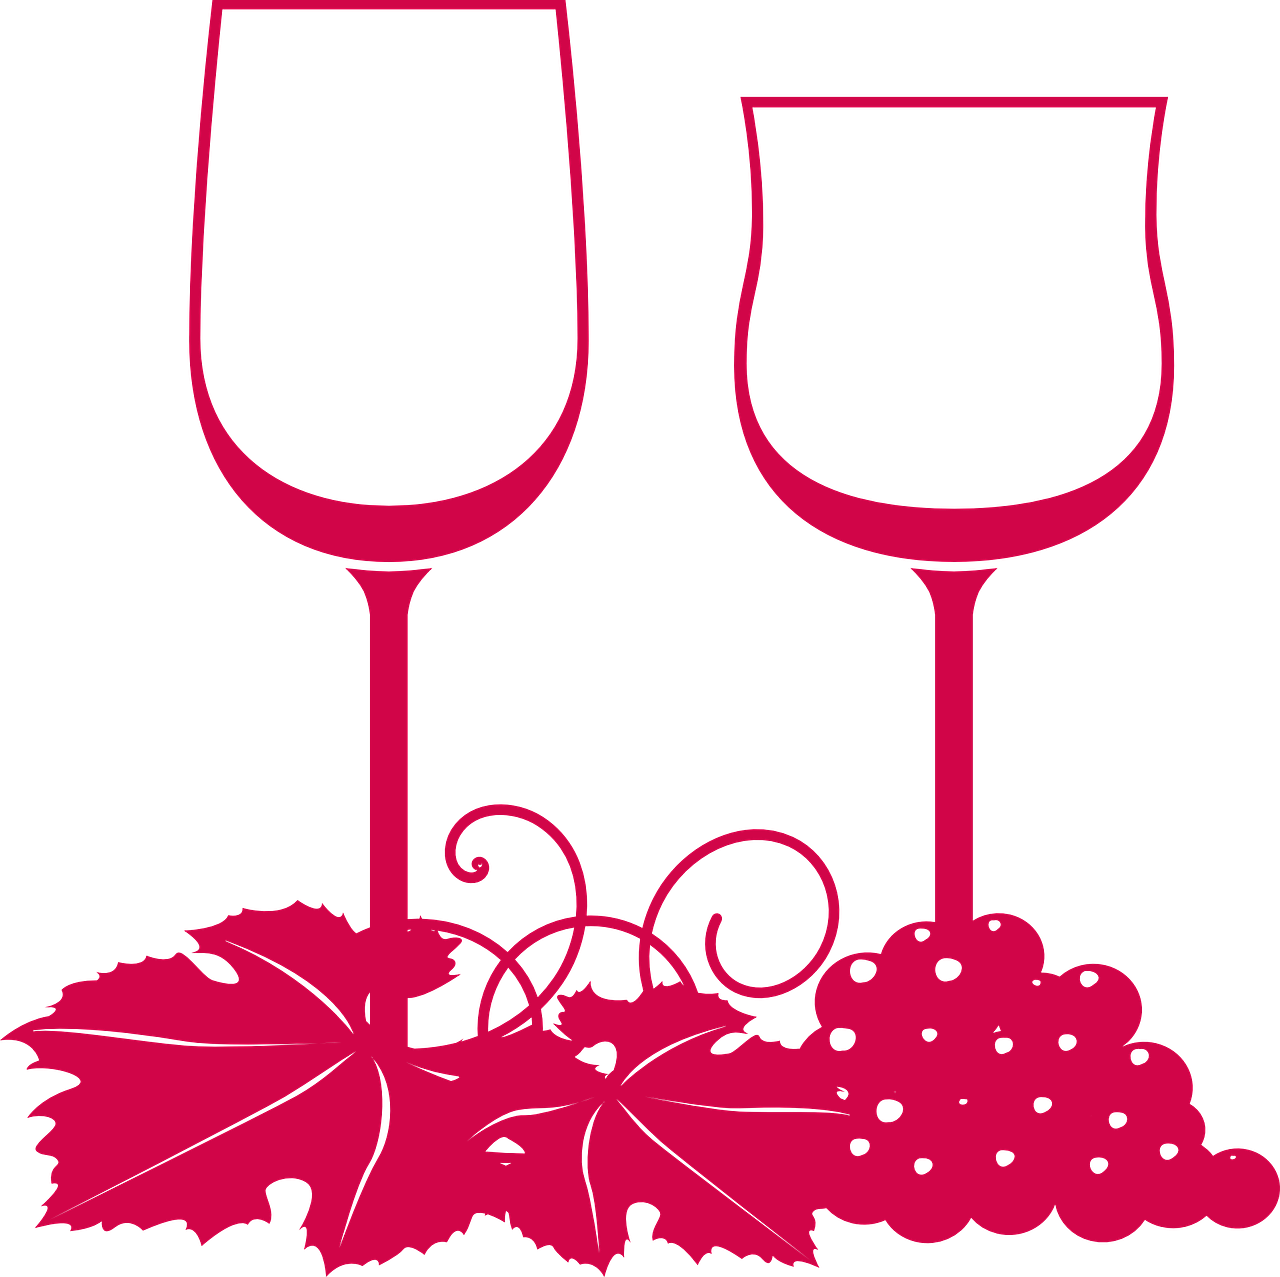
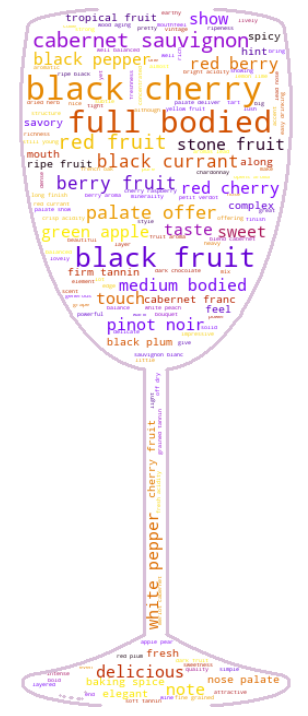
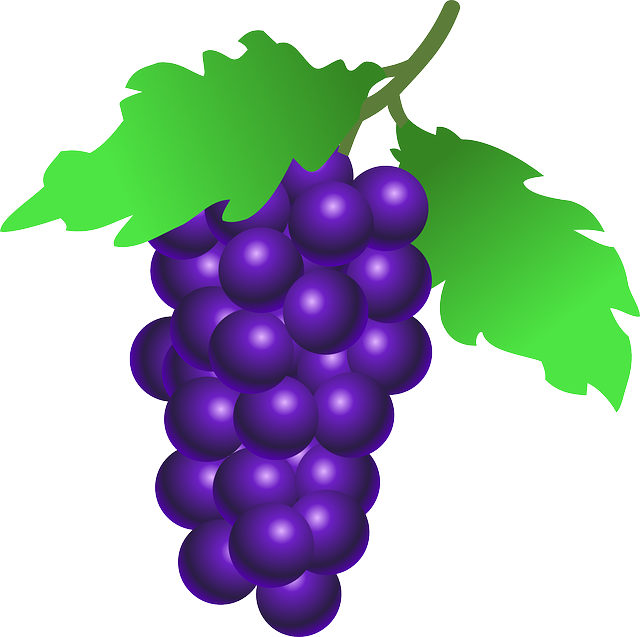

In [19]:
#Main dash
pn.Column(top,pn.Row(hg,pn.Column(w_tab,sp), glass), boxen, vp, bottom)

In [20]:
# Change widget parameter based on another widget parameter

# variable = pnw.Select(name='Select', options=['rating', 'desc_length', 'price', 'vintage'])
# upper =  pnw.IntSlider(name='upper', value= 100, start=0, end= 100)
# def cb(event):    
#     if event.new == 'price':        
#         upper.value = int(wine['price'].max())
#         upper.end = int(wine['price'].max())
#     elif event.new == 'rating':
#         upper.value = int(wine['rating'].max())
#         upper.end = int(wine['rating'].max())
#     elif event.new == 'desc_length':
#         upper.value = int(wine['desc_length'].max())
#         upper.end = int(wine['desc_length'].max())
#     elif event.new == 'vintage':
#         upper.value = int(wine['vintage'].max())
#         upper.end = int(wine['vintage'].max())    
#     else:
#         upper.value = 1000        
# variable.param.watch(cb,'value')

# pn.Row(variable, upper)

Row
    [0] HTML(str, width=1200)
    [1] PNG(PngImageFile, height=127, sizing_mode='fixed', width=150)
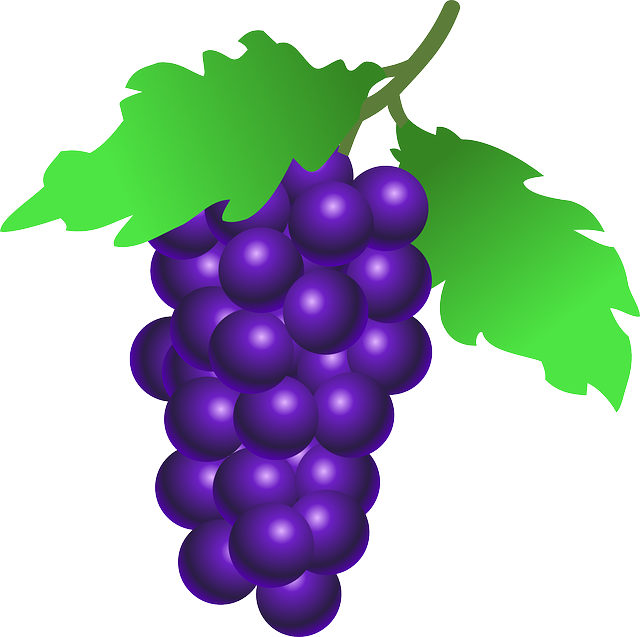

In [21]:
css = '''
.my-box {
    min-height: 20px;
    background-color: #f5f5f5;
    border: 10px solid #e3e3e3 !important;
    border-radius: 4px;
'''
pn.extension(raw_css=[css])

p = Image.open('grapes-34298_640.png')
logo  = pn.pane.PNG(p,width=150, height=127)
desc = pn.pane.HTML("""
  <b>Credits and Resources: </b><br>
   This analysis and the current dashboard were made with Python 3.8, used libraries: numpy, pandas, matplotlib, seaborn, nltk, PIL,WordCloud and panel.<br>   
   The pictures used as logos were taken from <a href=https://pixabay.com/vectors/search/wine/>pixalbay.com</a><br>
   The data for the grapes variety was obtained from <a href=https://en.wikipedia.org/wiki/List_of_grape_varieties>https://en.wikipedia.org/wiki/List_of_grape_varieties.</a>                                                                                                           
                                                                                                           """, width=1200)

bottom = pn.panel(pn.Row(desc, logo), css_classes=['my-box'], width=1440, margin=(0,0,0,0))
bottom

In [22]:
pn.config.raw_css=[]

In [26]:
html_pane = pn.pane.HTML("""
<h1>This is an HTML pane</h1>

<code>
x = 5;<br>
y = 6;<br>
z = x + y;
</code>

<br>
<br>

<table>
  <tr>
    <th>Firstname</th>
    <th>Lastname</th> 
    <th>Age</th>
  </tr>
  <tr>
    <td>Jill</td>
    <td>Smith</td> 
    <td>50</td>
  </tr>
  <tr>
    <td>Eve</td>
    <td>Jackson</td> 
    <td>94</td>
  </tr>
</table>
""", style={'background-color': '#F6F6F6', 'border': '2px solid black',
            'border-radius': '5px', 'padding': '10px'})

html_pane

HTML(str, style={'background-color': '#F6F...})

In [69]:
n = 55
pn.pane.HTML('''

                <style>
                    div.stuff {background-color: powderblue;                    
                                margin-top:0;
                                font-size:40px;
                                }
                </style>
                <div class='stuff'>
                    <h1>'''+str(n)+'''</h1>
                </div>
            ''') 
             #style={'font-size':'40px', 'color':'purple', 'border':'1px solid black','border-radius':'0px', 'height':'150px','padding':'0px'})

HTML(str)